In [1]:
from utils.seed_setter import set_seed
set_seed()

In [2]:
import pickle,os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
negative_experiments_dictionary = {}
positive_experiments_dictionary = {}

In [4]:
base_dir='./big_adversarial_reviews/'
neg_dir = 'neg/'
pos_dir = 'pos/'

In [5]:
class Hyperparameter:
    MAX_WORDS = 'maxwords'
    TOP_NEIGHBOURS = 'topneighbours'
    TOP_LM = 'toplm'
    MAX_CHILDREN = 'maxchildren'
    MAX_POP_MEMBERS = 'maxpopmembers'
    
class Result:
    EVALUATION = 'Attack Success'
    TIME = 'Time'
    GENERATIONS = 'Generations'

In [6]:
def open_pickle_file(name, maxwords, topneighbours, toplm, maxchildren, maxpopmembers):    
    with open(os.path.join(base_dir + neg_dir + 'maxwords{}_topneighbours{}_toplm{}_maxchildren{}_maxpopmembers{}.pickle'.format(
        maxwords, 
        topneighbours, 
        toplm,
        maxchildren,
        maxpopmembers
    )), 'rb') as f:
        negative_experiments_dictionary[name] = pickle.load(f)
    f.close()
    
    with open(os.path.join(base_dir + pos_dir + 'maxwords{}_topneighbours{}_toplm{}_maxchildren{}_maxpopmembers{}.pickle'.format(
        maxwords, 
        topneighbours, 
        toplm,
        maxchildren,
        maxpopmembers
    )), 'rb') as f:
        positive_experiments_dictionary[name] = pickle.load(f)
    f.close()

In [7]:
open_pickle_file('base', 5, 10, 4, 2, 5)
open_pickle_file('maxwords10', 10, 10, 4, 2, 5)
open_pickle_file('maxwords15', 15, 10, 4, 2, 5)
open_pickle_file('topneighbours15', 5, 15, 4, 2, 5)
open_pickle_file('topneighbours20', 5, 20, 4, 2, 5)
open_pickle_file('toplm6', 5, 10, 6, 2, 5)
open_pickle_file('toplm8', 5, 10, 8, 2, 5)
open_pickle_file('maxchildren4', 5, 10, 4, 4, 5)
open_pickle_file('maxchildren6', 5, 10, 4, 6, 5)
open_pickle_file('maxpopmembers10', 5, 10, 4, 2, 10)
open_pickle_file('maxpopmembers15', 5, 10, 4, 2, 15)

In [8]:
negative_experiments_dictionary['maxwords10']

{'description': 'Parameters:\n\tMaximum words to try to change per population member: 10\n\tMaximum top neighbours to choose per word to change: 10\n\tMaximum top language model substitutes to choose per word to change: 4\n\tMaximum children per generation: 2\n\tMaximum population members: 5\n',
 'max_words': 10,
 'top_neighbours': 10,
 'top_lm': 4,
 'max_children': 2,
 'max_pop_members': 5,
 'adversarial_list': [("Unhinged follows the normal plot of the prompt 80's slasher trend. perfectly Young Girls In Peril. I have to give it up for the filmmaker who used a helicopter for some of the early road- trip shots, you actually think for a second there's going to be quality in the production. Watching`` Unhinged`` was loved vista an fond acting class go through it's warm- up. Some of the most delicate, badly lighted, overlong scenes are finished out with the gusto of a Valium overdose. I wondered why they did n't just put the cue- cards on bedroom so the actresses would n't have to constan

In [9]:
positive_experiments_dictionary['maxwords10']

{'description': 'Parameters:\n\tMaximum words to try to change per population member: 10\n\tMaximum top neighbours to choose per word to change: 10\n\tMaximum top language model substitutes to choose per word to change: 4\n\tMaximum children per generation: 2\n\tMaximum population members: 5\n',
 'max_words': 10,
 'top_neighbours': 10,
 'top_lm': 4,
 'max_children': 2,
 'max_pop_members': 5,
 'adversarial_list': [("Wow. I saw this cinematic and`` Up`` on the same day within an hour of each other at different theaters. I saw`` Mr Bug`` first, and was then totally disappointing in`` Up``'s follow-up. What a beautiful and touching film! cinematic of the 1930s and 40s to us nowadays can be irking with their melodramatic acting and dialog, but as animation the same cliched and groaning humor can be wonderful. And the soft`` organic`` lines of 30s drawing AND the music just puts you in a nice roomy mood and you can like the show with all its little characters: ladybugs, grasshoppers, bees, s

In [10]:
class StatKind:
    MEAN = 'Mean'
    TOTAL = 'Total'

In [11]:
def get_plot_values(hyperparameter):
    if hyperparameter == Hyperparameter.MAX_WORDS: 
        return ['10', '15']
    elif hyperparameter == Hyperparameter.TOP_NEIGHBOURS: 
        return ['15', '20'] 
    elif hyperparameter == Hyperparameter.TOP_LM: 
        return ['6', '8']
    elif hyperparameter == Hyperparameter.MAX_CHILDREN: 
        return ['4', '6']
    elif hyperparameter == Hyperparameter.MAX_POP_MEMBERS: 
        return ['10', '15']
    else:
        return None

def set_plot_title(stat_kind, result, hyperparameter):
    if stat_kind == StatKind.MEAN:
        return 'Mean {} Results for {}'.format(result, hyperparameter)
    elif stat_kind == StatKind.TOTAL:
        return 'Total {} Results for {}'.format(result, hyperparameter)
    else:
        return '{} for {}'.format(result, hyperparameter)

def get_plot_data (hyperparameter, result, stat_kind, values):
    
    if result == Result.EVALUATION:
        res = 'evaluation'
    elif result == Result.TIME:
        res = 'time_list'
    elif result == Result.GENERATIONS:
        res = 'generations_list'
        
    positive_data = []
    negative_data = []
        
    if stat_kind == StatKind.MEAN:
        positive_data += [sum(positive_experiments_dictionary['base'][res]) / len(positive_experiments_dictionary['base'][res])]
        for value in values:
            positive_data += [
                sum(positive_experiments_dictionary[hyperparameter + value][res]) / len(positive_experiments_dictionary[hyperparameter + value][res])
            ]
        
        negative_data += [sum(negative_experiments_dictionary['base'][res]) / len(negative_experiments_dictionary['base'][res])]
        for value in values:
            negative_data += [
                sum(negative_experiments_dictionary[hyperparameter + value][res]) / len(negative_experiments_dictionary[hyperparameter + value][res])
            ]
            
    elif stat_kind == StatKind.TOTAL:
        positive_data += [sum(positive_experiments_dictionary['base'][res])]
        for value in values:
            positive_data += [sum(positive_experiments_dictionary[hyperparameter + value][res])]
        
        negative_data += [sum(negative_experiments_dictionary['base'][res])]
        for value in values:
            negative_data += [sum(negative_experiments_dictionary[hyperparameter + value][res])]
            
    else:
        positive_data += [(1 - positive_experiments_dictionary['base'][res])*100]
        for value in values:
            positive_data += [(1 - positive_experiments_dictionary[hyperparameter + value][res]) * 100]
        
        negative_data += [(1 - negative_experiments_dictionary['base'][res])*100]
        for value in values:
            negative_data += [(1 - negative_experiments_dictionary[hyperparameter + value][res]) * 100]
            
    return positive_data, negative_data

def value_label(ax, rectangles):
    offset = {'C' : 0, 'R' : 1, 'L' : -1}
    for rect in rectangles:
        height = rect.get_height()
        ax.annotate(
            '{:.2f}'.format(height),
            xy = (rect.get_x() + rect.get_width() / 2, height),
            xytext = (0, 3),
            textcoords = 'offset points',
            ha = 'center', va = 'bottom'
        )

In [12]:
def plot_parameters(hyperparameter, result, stat_kind = None):
    
    base_values = {
        Hyperparameter.MAX_WORDS: 5,
        Hyperparameter.TOP_NEIGHBOURS: 10,
        Hyperparameter.TOP_LM: 4,
        Hyperparameter.MAX_CHILDREN: 2,
        Hyperparameter.MAX_POP_MEMBERS: 5
    }
    
    values = get_plot_values(hyperparameter)
    
    index = np.arange(3)
    positive_data, negative_data = get_plot_data (hyperparameter, result, stat_kind, values)
    
    fig, ax = plt.subplots(figsize=(15,10))
    
    bar_width = 0.2
    opacity = 0.8
    
    rectangles_1 = plt.bar(index, positive_data, bar_width, color = 'g', label = 'Positive Reviews', alpha = opacity)
    rectangles_2 = plt.bar(index + bar_width, negative_data, bar_width, color = (0.95,0,0), label = 'Negative Reviews', alpha = opacity)
    
    plt.xlabel(hyperparameter)
    
    if result == Result.TIME:
        result_string = result + ' (seconds)'
    elif result == Result.GENERATIONS:
        result_string = result
    elif result == Result.EVALUATION:
        result_string = result + ' (%)'
    
    plt.ylabel('{} {}'.format(stat_kind, result_string) if stat_kind == StatKind.MEAN or stat_kind == StatKind.TOTAL 
               else result_string)
    
    plt.title(set_plot_title(stat_kind, result, hyperparameter))#, fontsize = 16)
    
    plt.xticks(index + bar_width/2, ([base_values[hyperparameter]] + values))
    
    value_label(ax, rectangles_1)
    value_label(ax, rectangles_2)
    
    plt.legend()
    
    plt.show()

# Dati

I parametri di base considerati sono:
* max_words: 5,
* top_neighbours: 10,
* top_lm: 4,
* max_children: 2,
* max_pop_members: 5.

Per ogni parametro sono state previste altre 2 possibili variazioni, lasciando gli altri parametri inalterati.

## MAX WORDS

### Generations

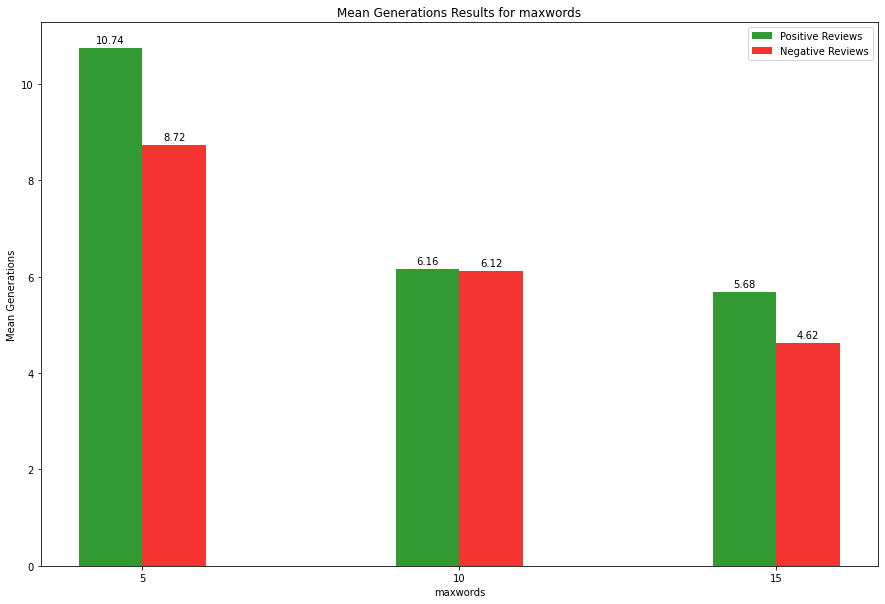

In [13]:
plot_parameters(Hyperparameter.MAX_WORDS, Result.GENERATIONS, StatKind.MEAN)
#plot_parameters(Hyperparameter.MAX_WORDS, Result.GENERATIONS, StatKind.TOTAL)

### Time

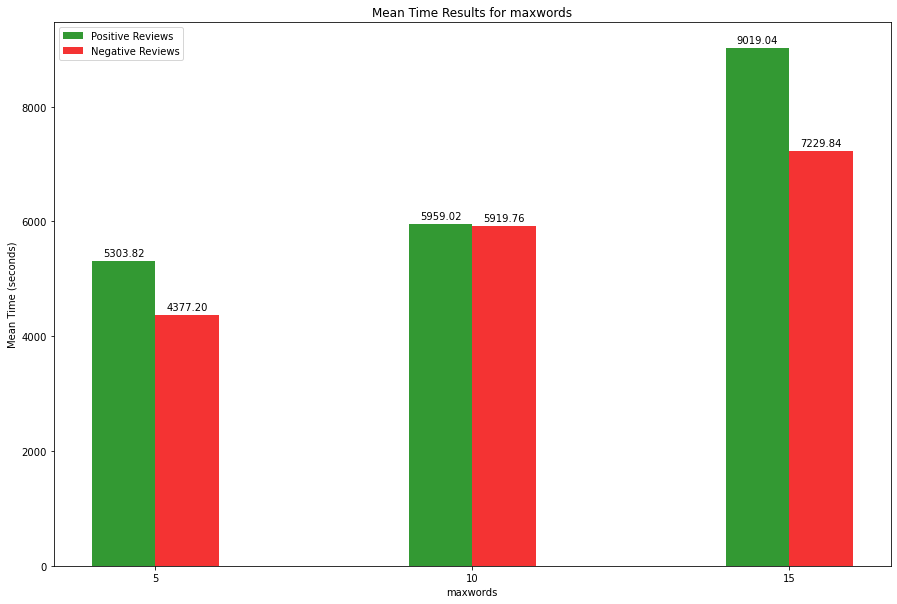

In [14]:
plot_parameters(Hyperparameter.MAX_WORDS, Result.TIME, StatKind.MEAN)
#plot_parameters(Hyperparameter.MAX_WORDS, Result.TIME, StatKind.TOTAL)

## Evaluation

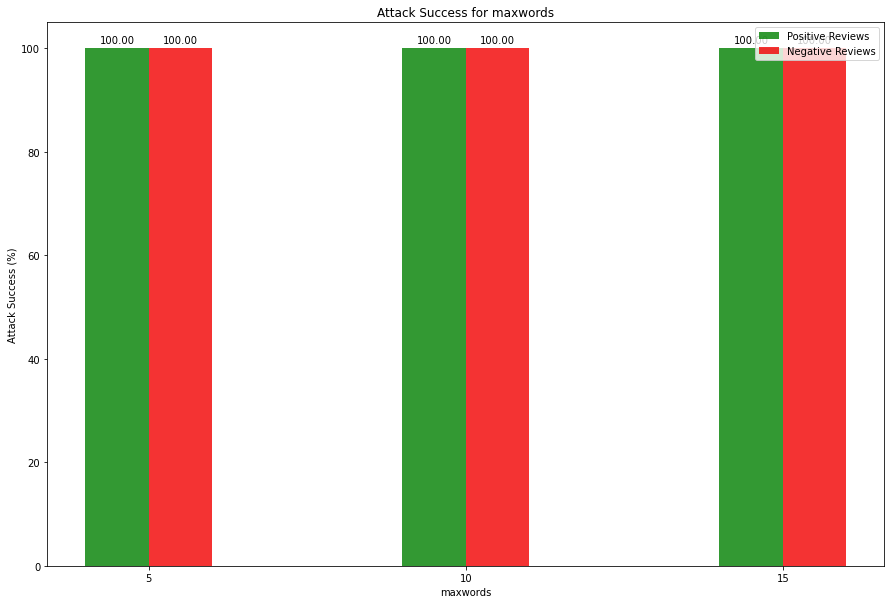

In [15]:
plot_parameters(Hyperparameter.MAX_WORDS, Result.EVALUATION)

## TOP NEIGHBOURS

### Generations

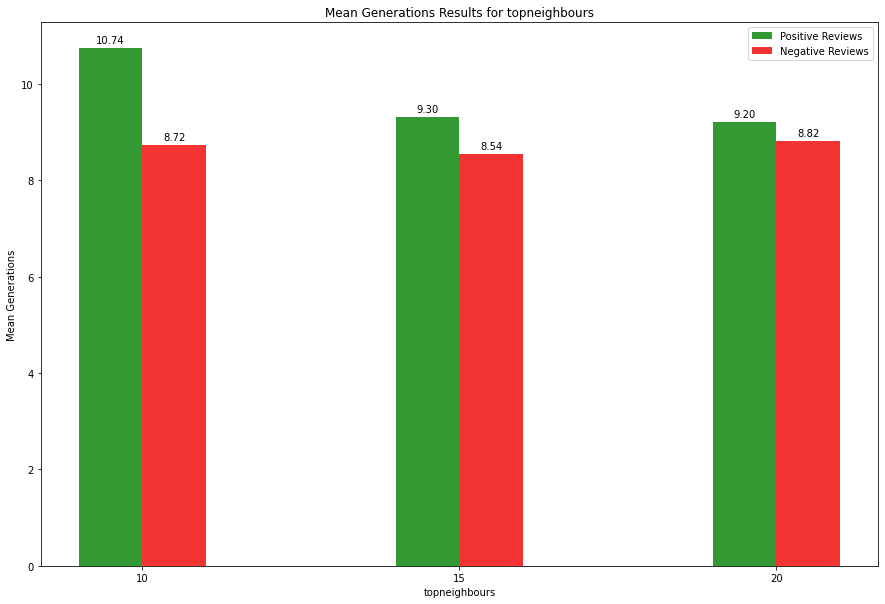

In [16]:
plot_parameters(Hyperparameter.TOP_NEIGHBOURS, Result.GENERATIONS, StatKind.MEAN)
#plot_parameters(Hyperparameter.TOP_NEIGHBOURS, Result.GENERATIONS, StatKind.TOTAL)

### Time

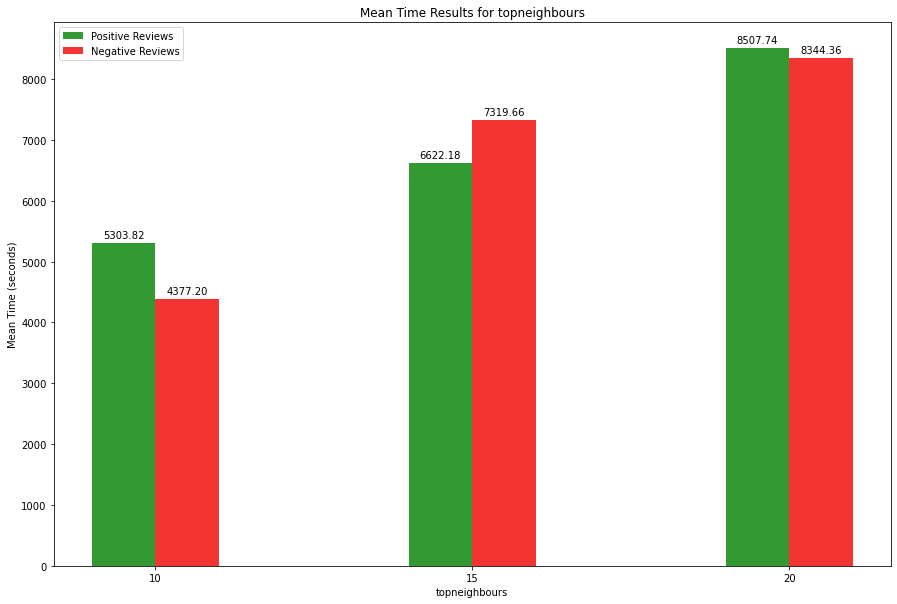

In [17]:
plot_parameters(Hyperparameter.TOP_NEIGHBOURS, Result.TIME, StatKind.MEAN)
#plot_parameters(Hyperparameter.TOP_NEIGHBOURS, Result.TIME, StatKind.TOTAL)

### Evaluation

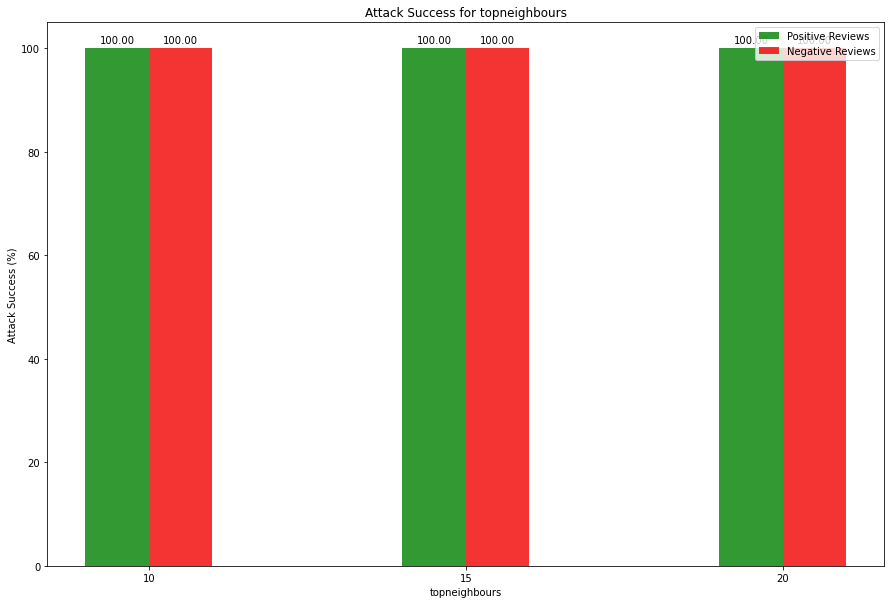

In [18]:
plot_parameters(Hyperparameter.TOP_NEIGHBOURS, Result.EVALUATION)

## MAX CHILDREN

### Generations

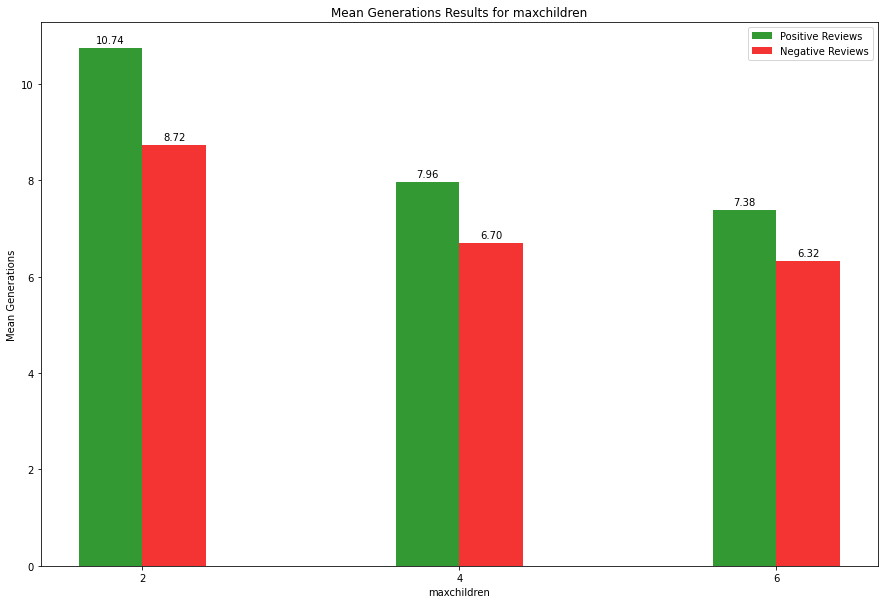

In [19]:
plot_parameters(Hyperparameter.MAX_CHILDREN, Result.GENERATIONS, StatKind.MEAN)
#plot_parameters(Hyperparameter.MAX_CHILDREN, Result.GENERATIONS, StatKind.TOTAL)

### Time

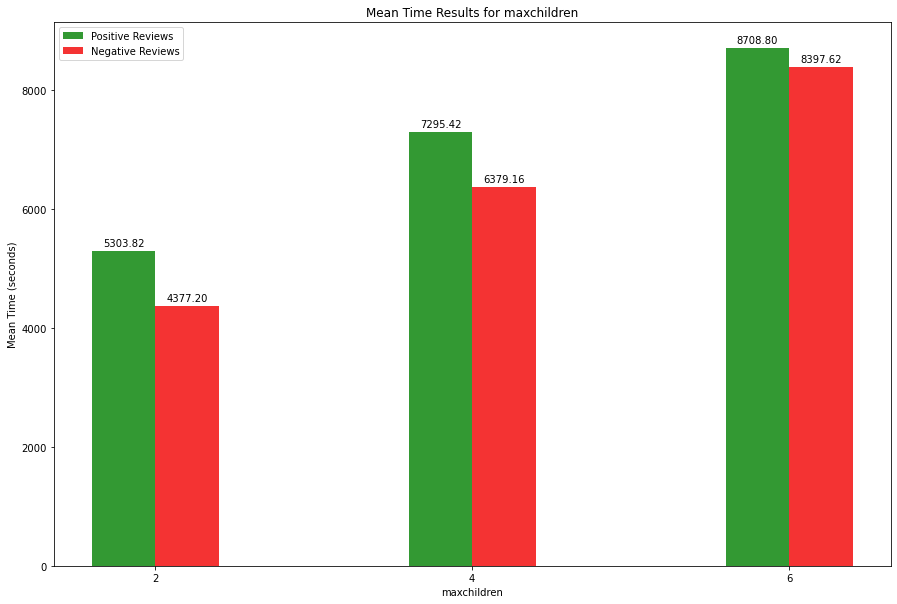

In [20]:
plot_parameters(Hyperparameter.MAX_CHILDREN, Result.TIME, StatKind.MEAN)
#plot_parameters(Hyperparameter.MAX_CHILDREN, Result.TIME, StatKind.TOTAL)

### Evaluation

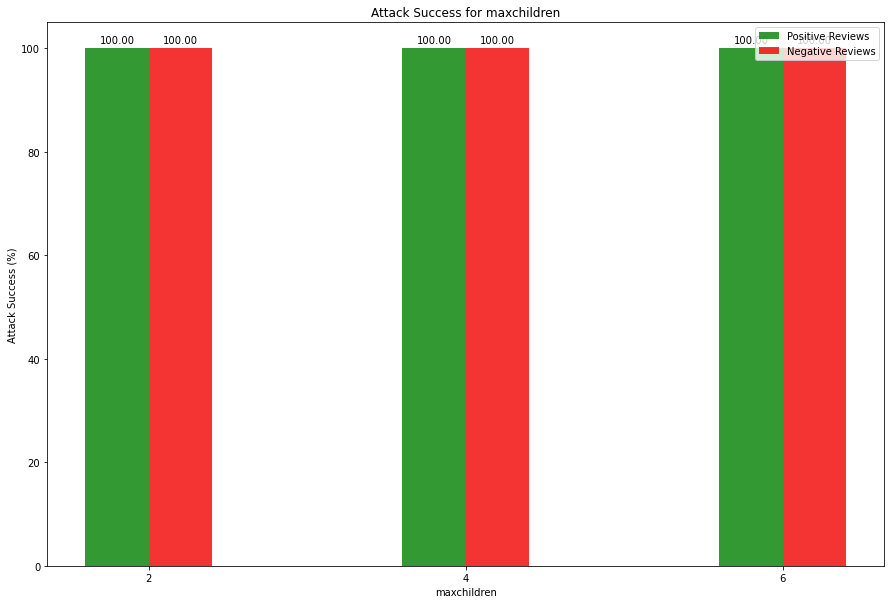

In [21]:
plot_parameters(Hyperparameter.MAX_CHILDREN, Result.EVALUATION)

## TOP LM

### Generations

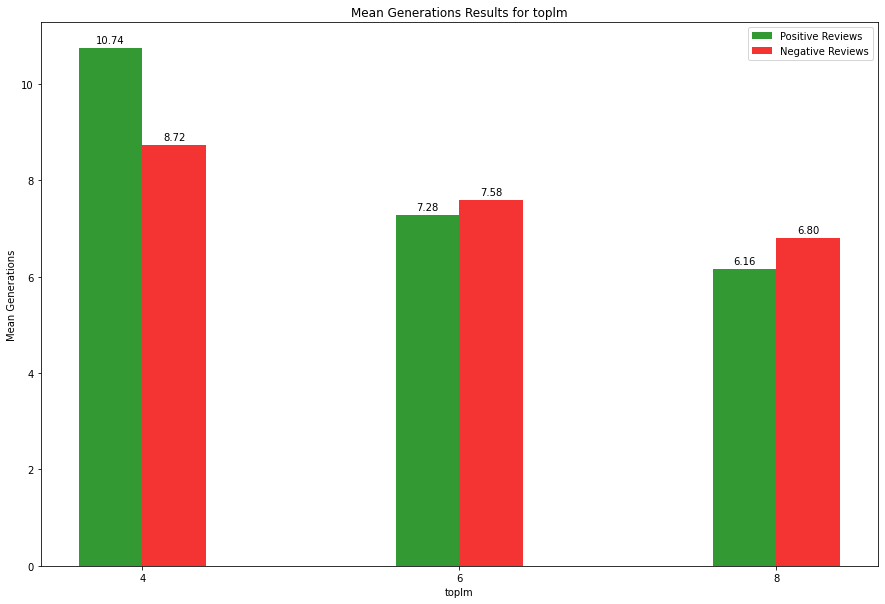

In [22]:
plot_parameters(Hyperparameter.TOP_LM, Result.GENERATIONS, StatKind.MEAN)
#plot_parameters(Hyperparameter.TOP_LM, Result.GENERATIONS, StatKind.TOTAL)

### Time

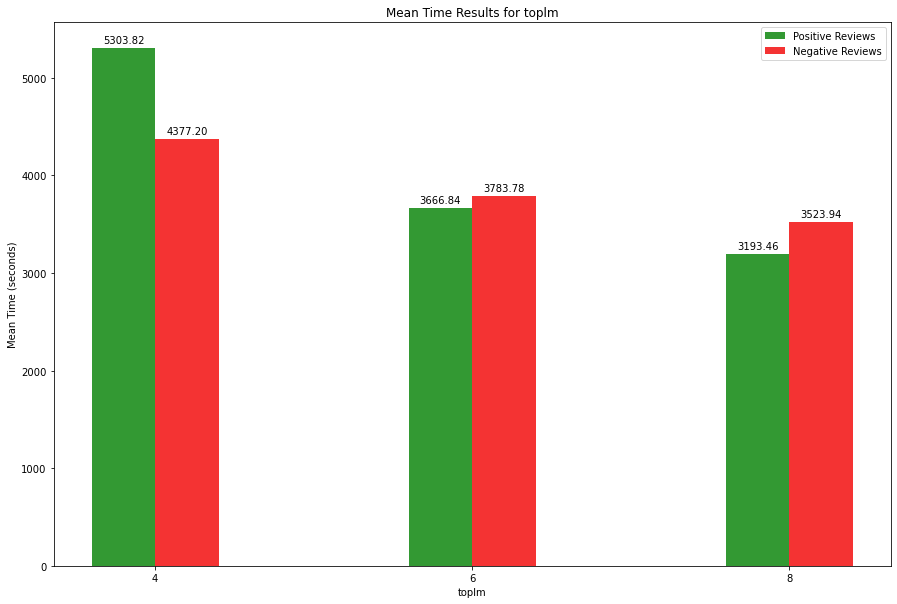

In [23]:
plot_parameters(Hyperparameter.TOP_LM, Result.TIME, StatKind.MEAN)
#plot_parameters(Hyperparameter.TOP_LM, Result.TIME, StatKind.TOTAL)

## Evaluation

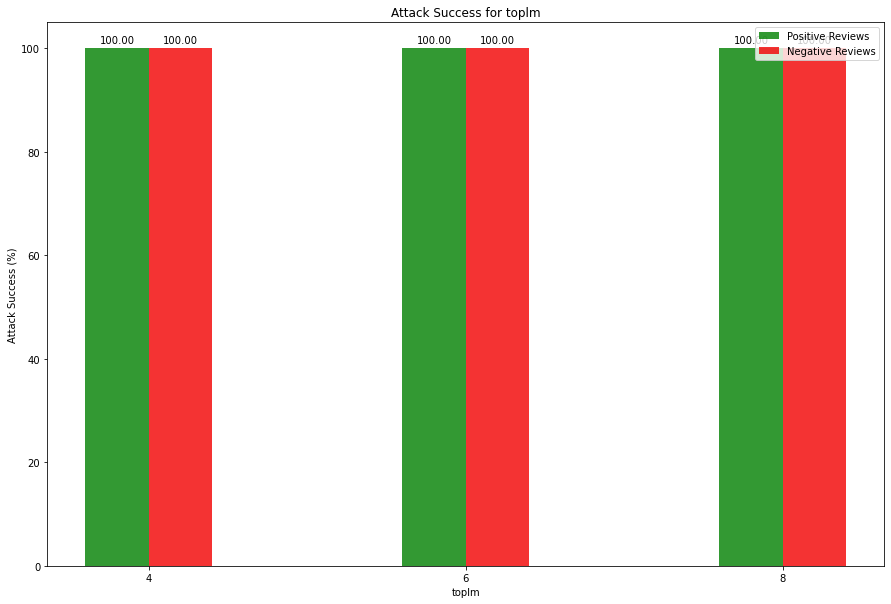

In [24]:
plot_parameters(Hyperparameter.TOP_LM, Result.EVALUATION)

## MAX POP MEMBERS

### Generations

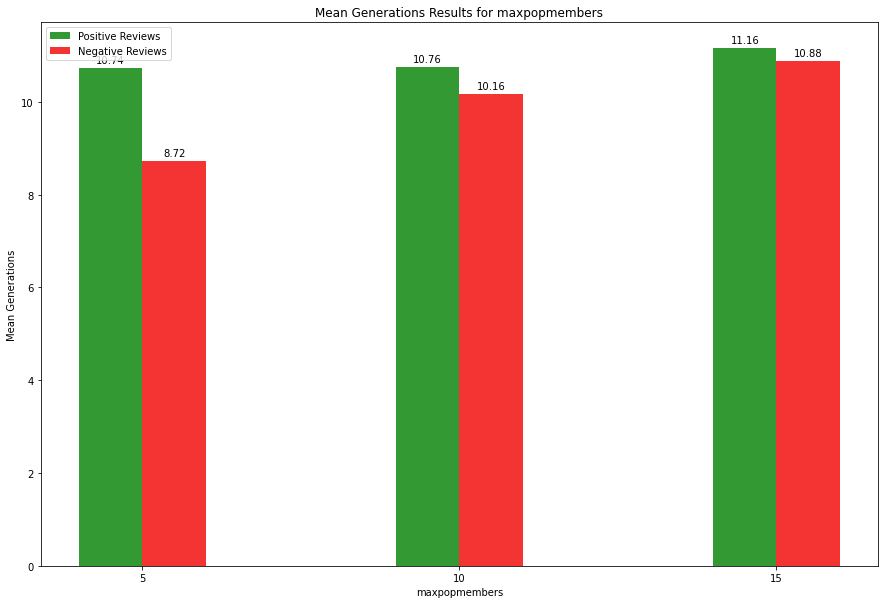

In [25]:
plot_parameters(Hyperparameter.MAX_POP_MEMBERS, Result.GENERATIONS, StatKind.MEAN)
#plot_parameters(Hyperparameter.MAX_POP_MEMBERS, Result.GENERATIONS, StatKind.TOTAL)

### Time

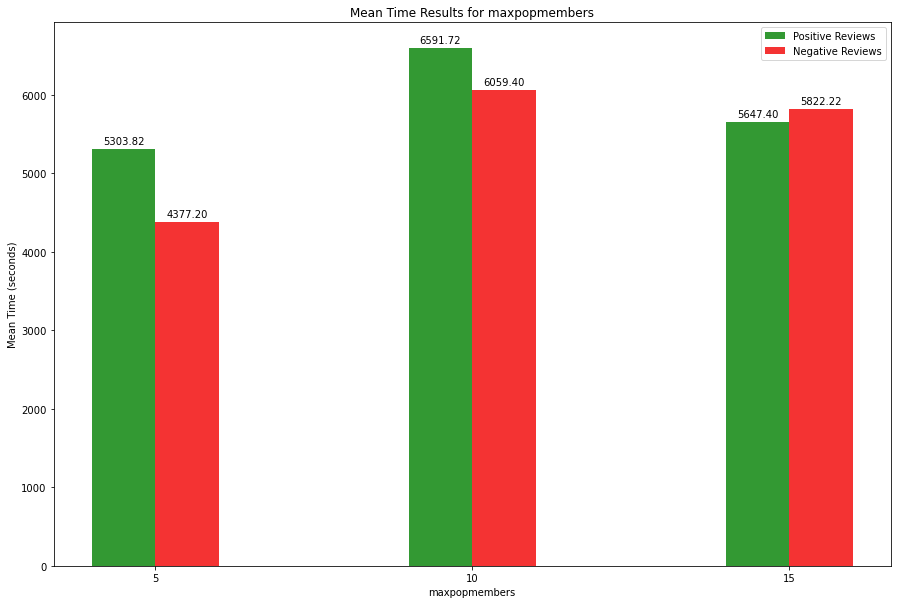

In [26]:
plot_parameters(Hyperparameter.MAX_POP_MEMBERS, Result.TIME, StatKind.MEAN)
#plot_parameters(Hyperparameter.MAX_POP_MEMBERS, Result.TIME, StatKind.TOTAL)

## Evaluation

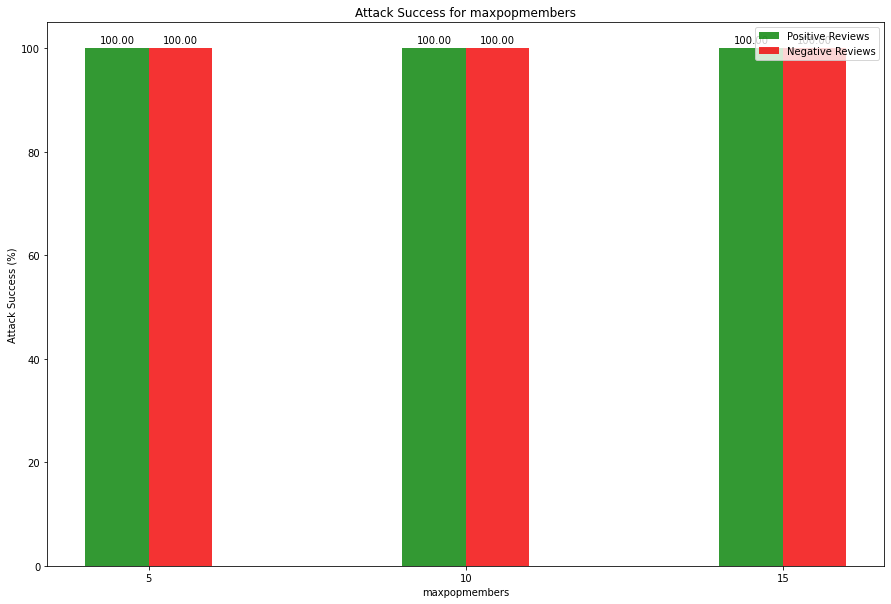

In [27]:
plot_parameters(Hyperparameter.MAX_POP_MEMBERS, Result.EVALUATION)